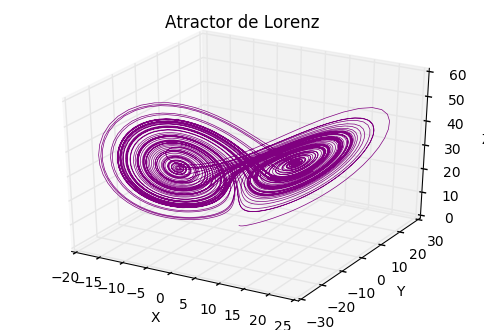

In [1]:
# Plot of the Lorenz Attractor based on Edward Lorenz's 1963 "Deterministic
# Nonperiodic Flow" publication.
# http://journals.ametsoc.org/doi/abs/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2
#
# Note: Because this is a simple non-linear ODE, it would be more easily
#       done using SciPy's ode solver, but this approach depends only
#       upon NumPy.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot


dt = 0.01
stepCnt = 10000

# Need one more for the initial values
xs = np.empty((stepCnt + 1,))
ys = np.empty((stepCnt + 1,))
zs = np.empty((stepCnt + 1,))

# Setting initial values
xs[0], ys[0], zs[0] = (0., 1., 1.05)

# Stepping through "time".
for i in range(stepCnt):
    # Derivatives of the X, Y, Z state
    x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i])
    xs[i + 1] = xs[i] + (x_dot * dt)
    ys[i + 1] = ys[i] + (y_dot * dt)
    zs[i + 1] = zs[i] + (z_dot * dt)

fig = plt.figure()

ax = fig.gca(projection='3d')

ax.plot(xs, ys, zs, lw=0.5,color='purple',)
ax.set_xlabel("X ")
ax.set_ylabel("Y ")
ax.set_zlabel("Z")
ax.set_title("Atractor de Lorenz")

plt.show()


In [2]:
#fuente: https://matplotlib.org/2.0.0/examples/mplot3d/lorenz_attractor.html

In [3]:
#Otra opción

In [4]:
############################################################################################################

In [5]:
############################################################################################################

In [6]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [7]:
font_family = 'Myriad Pro'
title_font = fm.FontProperties(family=font_family, style='normal', size=20, weight='normal', stretch='normal')

In [8]:
#Para crear una carpeta donde guarde las imágenes
# save_folder = 'images'
# if not os.path.exists(save_folder):
  #  os.makedirs(save_folder)

In [9]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)


In [10]:
# define the lorenz system
# x, y, and z make up the system state, t is time, and sigma, rho, beta are the system parameters
def lorenz_system(current_state, t):
    
    # positions of x, y, z in space at the current time point
    x, y, z = current_state
    
    # define the 3 ordinary differential equations known as the lorenz equations
    dx_dt = sigma * (y - x)
    dy_dt = x * (rho - z) - y
    dz_dt = x * y - beta * z
    
    # return a list of the equations that describe the system
    return [dx_dt, dy_dt, dz_dt]

In [11]:
# use odeint() to solve a system of ordinary differential equations
# the arguments are: 
# 1, a function - computes the derivatives
# 2, a vector of initial system conditions (aka x, y, z positions in space)
# 3, a sequence of time points to solve for
# returns an array of x, y, and z value arrays for each time point, with the initial values in the first row
xyz = odeint(lorenz_system, initial_state, time_points)

# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]

/opt/anaconda/anaconda3/lib/python3.5/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['Myriad Pro'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


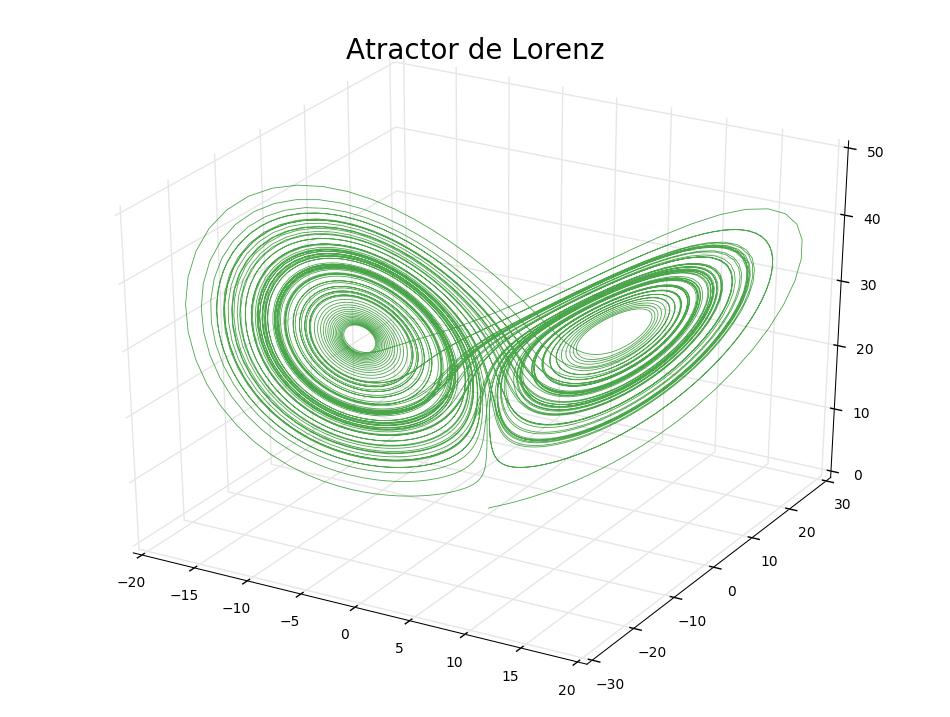

In [12]:


# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.xaxis.set_pane_color((1,1,1,1))
ax.yaxis.set_pane_color((1,1,1,1))
ax.zaxis.set_pane_color((1,1,1,1))
ax.plot(x, y, z, color='green', alpha=0.7, linewidth=0.6)
ax.set_title('Atractor de Lorenz', fontproperties=title_font)

# Para guardarlo
#fig.savefig('{}/lorenz-attractor-3d.png'.format(save_folder), dpi=180, bbox_inches='tight')
plt.show()



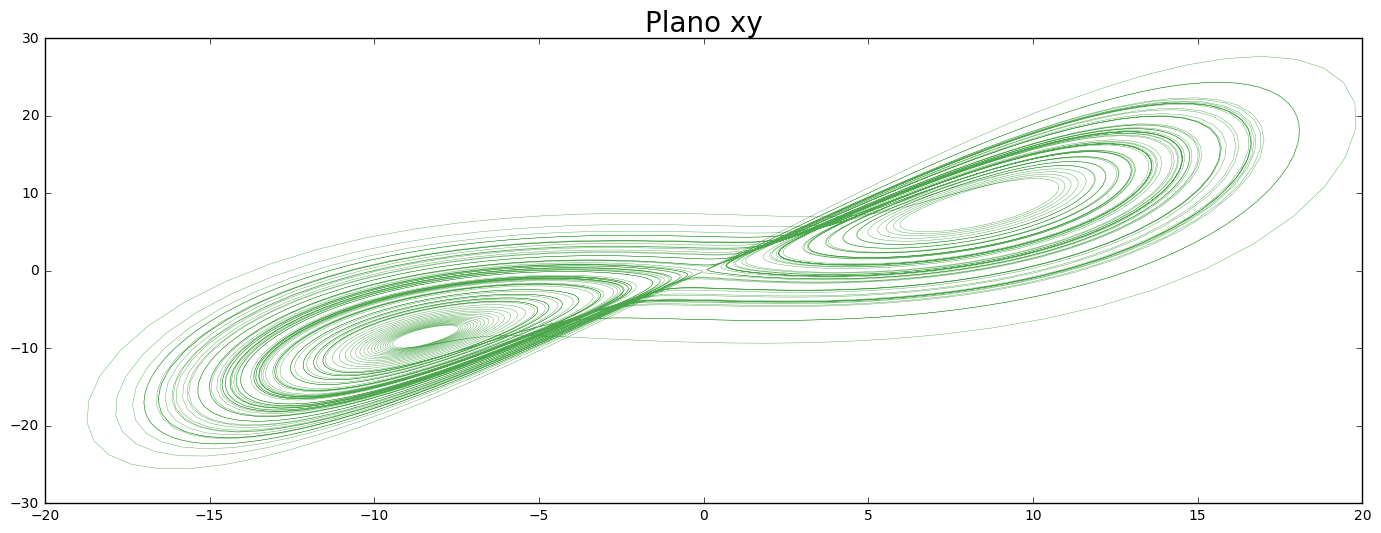

In [13]:
#Visualizándolo en diversos planos



#Plano x-y
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots( sharex=False, sharey=False, figsize=(17, 6))
# plot the x values vs the y values
ax.plot(x, y, color='green', alpha=0.7, linewidth=0.3)
ax.set_title('Plano xy', fontproperties=title_font)
plt.show()


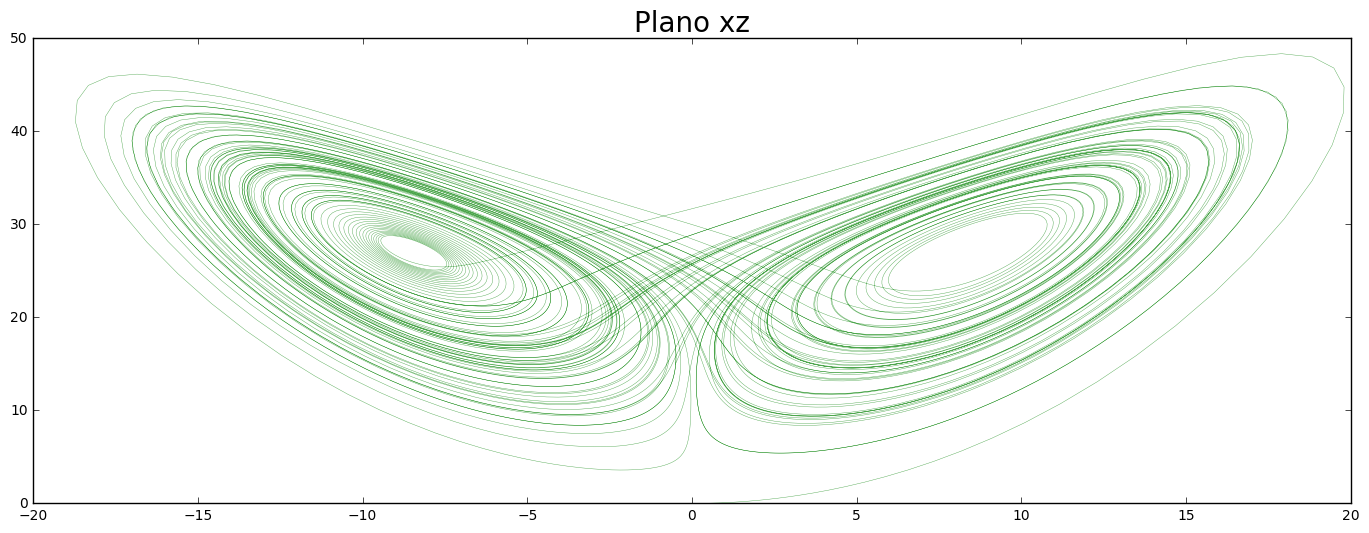

In [14]:
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots( sharex=False, sharey=False, figsize=(17, 6))
# plot the x values vs the z values
ax.plot(x, z, color='green', alpha=0.7, linewidth=0.3)
ax.set_title('Plano xz', fontproperties=title_font)
plt.show()

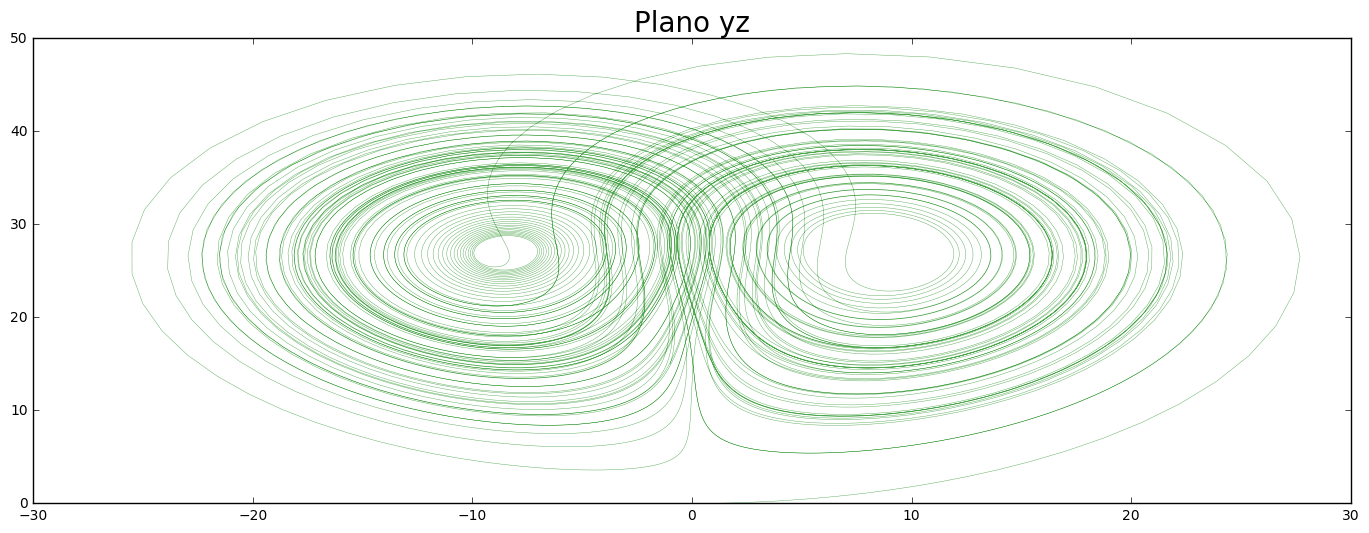

In [15]:
# now plot two-dimensional cuts of the three-dimensional phase space
fig, ax = plt.subplots( sharex=False, sharey=False, figsize=(17, 6))

# plot the y values vs the z values
ax.plot(y, z, color='green', alpha=0.7, linewidth=0.3)
ax.set_title('Plano yz', fontproperties=title_font)
plt.show()

In [16]:
#fig.savefig('{}/lorenz-attractor-phase-plane.png'.format(save_folder), dpi=180, bbox_inches='tight')


#fuente: https://github.com/gboeing/lorenz-system/blob/master/lorenz-system-attractor-visualize.ipynb